# Credit Card Segmentation

This case requires trainees to develop a customer segmentation to define
marketing strategy. The sample dataset summarizes the usage behaviour of about 9000
active credit card holders during the last 6 months. The file is at a customer level with
18 behavioural variables.

# Data Dictionary:
    1.CUST_ID: Credit card holder ID
    2.BALANCE: Monthly average balance (based on daily balance averages)
    3.BALANCE_FREQUENCY: Ratio of last 12 months with balance
    4.PURCHASES: Total purchase amount spent during last 12 months
    5.ONEOFF_PURCHASES: Total amount of one-off purchases
    6.INSTALLMENTS_PURCHASES: Total amount of installment purchases
    7.CASH_ADVANCE: Total cash-advance amount
    8.PURCHASES_ FREQUENCY: Frequency of purchases (Percent of months with at least one purchase)
    9.ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off-purchases PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases
    10.CASH_ADVANCE_ FREQUENCY: Cash-Advance frequency
    11.AVERAGE_PURCHASE_TRX: Average amount per purchase transaction
    12.CASH_ADVANCE_TRX: Average amount per cash-advance transaction
    13.PURCHASES_TRX: Average amount per purchase transaction
    14.CREDIT_LIMIT: Credit limit
    15.PAYMENTS: Total payments (due amount paid by the customer to decrease their statement balance) in the period
    16.MINIMUM_PAYMENTS: Total minimum payments due in the period.
    17.PRC_FULL_PAYMEN: Percentage of months with full payment of the due statement balance
    18.TENURE: Number of months as a customer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#set size of column, rows and width of Dataset
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',20000)
pd.set_option('display.width', 1000)

In [3]:
cc_data = pd.read_csv("credit-card-data.csv")

# EDA

In [4]:
cc_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
cc_data.shape

(8950, 18)

we'll drop the CUST_ID  as we don't require it

In [6]:
cc_data.drop('CUST_ID', axis=1, inplace=True)

In [7]:
cc_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [9]:
cc_data.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [10]:
cc_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [11]:
cc_data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [12]:
cc_data.corr().style.background_gradient(cmap='jet')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


# Observations:
    1.The Tenure of Credit is 1 to 12 months.
    2.The balance ranges from 0 to 19043.
    3.Minimum payment ranges upto 76406.

# 1) Missing Value Analysis

In [13]:
#Missing value Count
#Calculating Missing Value Percentage
Total_Count = cc_data.isnull().sum()
missing_vals = pd.concat([Total_Count,round(cc_data.isnull().sum()/len(cc_data)*100,2)],axis=1, keys=['Total_Count', 'Miss Per'])
missing_vals.sort_values(ascending=False,by="Miss Per")

,Total_Count,Miss Per
MINIMUM_PAYMENTS,313,3.50
CREDIT_LIMIT,1,0.01
BALANCE,0,0.00
CASH_ADVANCE_FREQUENCY,0,0.00
PRC_FULL_PAYMENT,0,0.00
PAYMENTS,0,0.00
PURCHASES_TRX,0,0.00
CASH_ADVANCE_TRX,0,0.00
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.00
BALANCE_FREQUENCY,0,0.00


# As we can see that we have two faeture with missing value i.e 
    1.MINIMUM_PAYMENTS 313(3.50%)
    2.CREDIT_LIMIT    1(0.01%)


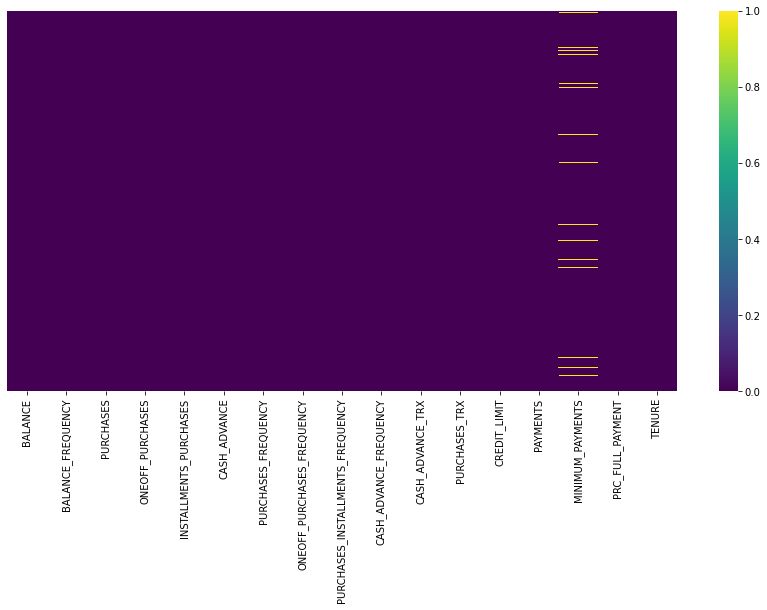

In [14]:
#Analyzing Missing value by Heatmap
plt.figure(figsize=(15,7))
sns.heatmap(cc_data.isnull(), yticklabels=False, cmap='viridis')

# Now, we will Impute Missing value as there are only few missing value.

In [15]:
#Imputing missing value with Mean
cc_data.fillna(cc_data.mean(), inplace=True)
cc_data.isnull().sum().any()

False

In [16]:
cc_data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# As we can see that there are no missing value in the Data set

# Deriving New KPI'S

1. monthly average purchase
2. cash advance amount
3. purchases by type
4. limit usage
5. payments to minimum payments ratio 


# 1. MONTHLY_AVG_PURCHASE

In [17]:
cc_data['MONTHLY_AVG_PURCHASE'] = cc_data['PURCHASES']/cc_data['TENURE']

In [18]:
cc_data['MONTHLY_AVG_PURCHASE'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: MONTHLY_AVG_PURCHASE, dtype: float64

# 2. CASH_ADV_AMOUNT

In [19]:
cc_data['CASH_AVG_AMOUNT'] = cc_data['CASH_ADVANCE']/cc_data['TENURE']

In [20]:
cc_data['CASH_AVG_AMOUNT'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: CASH_AVG_AMOUNT, dtype: float64

# 3. PURCHASE_BY_TYPE

To see the purchase type we have to explore the data to get the analysis of any pattern of valueable outcome

In [21]:
cc_data.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head(20)

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
5,0.00,1333.28
6,6402.63,688.38
7,0.00,436.20
8,661.49,200.00
9,1281.60,0.00


# As we can see the above data:
    Observation:
        1.When ONEOFF_PURCHASES==0 & INSTALLMENTS_PURCHASES==0 ---> There is no purchase
        2.When ONEOFF_PURCHASES==0 & INSTALLMENTS_PURCHASES>0 ---> People who did only INSTALLMENTS_PURCHASES
        3.When ONEOFF_PURCHASES>0 & INSTALLMENTS_PURCHASES==0 ---> People who did only ONEOFF_PURCHASES
        4.When ONEOFF_PURCHASES>0 & INSTALLMENTS_PURCHASES>0 ---> People who did  Both. 

In [22]:
cc_data[(cc_data['ONEOFF_PURCHASES']==0) & (cc_data['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 19)

In [23]:
cc_data[(cc_data['ONEOFF_PURCHASES']==0) & (cc_data['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 19)

In [24]:
cc_data[(cc_data['ONEOFF_PURCHASES']>0) & (cc_data['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 19)

In [25]:
cc_data[(cc_data['ONEOFF_PURCHASES']>0) & (cc_data['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 19)

In [26]:
def purchase(cc_data):
    if (cc_data['ONEOFF_PURCHASES']==0) & (cc_data['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (cc_data['ONEOFF_PURCHASES']==0) & (cc_data['INSTALLMENTS_PURCHASES']>0):
         return 'installment'
    if (cc_data['ONEOFF_PURCHASES']>0) & (cc_data['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (cc_data['ONEOFF_PURCHASES']>0) & (cc_data['INSTALLMENTS_PURCHASES']>0):
        return 'both_oneoff_installment'

In [27]:
cc_data['purchase_type']=cc_data.apply(purchase,axis=1)

In [28]:
cc_data['purchase_type'].value_counts()

both_oneoff_installment    2774
installment                2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

In [29]:
cc_data.shape

(8950, 20)

# 4.LIMIT_USAGE

In [30]:
cc_data['LIMIT_USAGE'] = cc_data['BALANCE']/cc_data['CREDIT_LIMIT']

In [31]:
cc_data['LIMIT_USAGE'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: LIMIT_USAGE, dtype: float64

# 5. PAY_MIN_RATIO

In [32]:
cc_data['PAY_MIN_RATIO'] = cc_data['PAYMENTS']/cc_data['MINIMUM_PAYMENTS']

In [33]:
cc_data['PAY_MIN_RATIO'].head()

0    1.446508
1    3.826241
2    0.991682
3    0.000000
4    2.771075
Name: PAY_MIN_RATIO, dtype: float64

In [34]:
cc_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,CASH_AVG_AMOUNT,purchase_type,LIMIT_USAGE,PAY_MIN_RATIO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,one_off,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,124.916667,17.149001,one_off,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,one_off,0.681429,2.771075


In [35]:
cc_data.shape

(8950, 22)

In [36]:
cc_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,CASH_AVG_AMOUNT,LIMIT_USAGE,PAY_MIN_RATIO
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,86.175173,88.977984,0.388883,9.036121
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331,180.508787,193.136115,0.389722,118.176913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,3.399375,0.000000,0.041494,0.907301
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,31.936667,0.000000,0.302720,2.017230
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,97.228333,99.085196,0.717571,6.049228
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,15.909951,6840.528861


# Insights Form New KPI'S

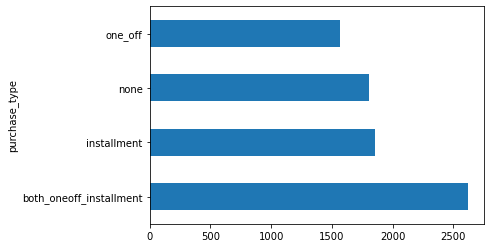

In [37]:
cc_data.groupby('purchase_type')['BALANCE_FREQUENCY'].sum().plot.barh()

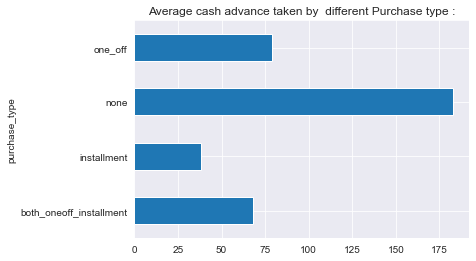

In [101]:
#%matplotlib notebook
cc_data.groupby('purchase_type')['CASH_AVG_AMOUNT'].mean().plot.barh()

plt.title('Average cash advance taken by  different Purchase type :')
plt.show()

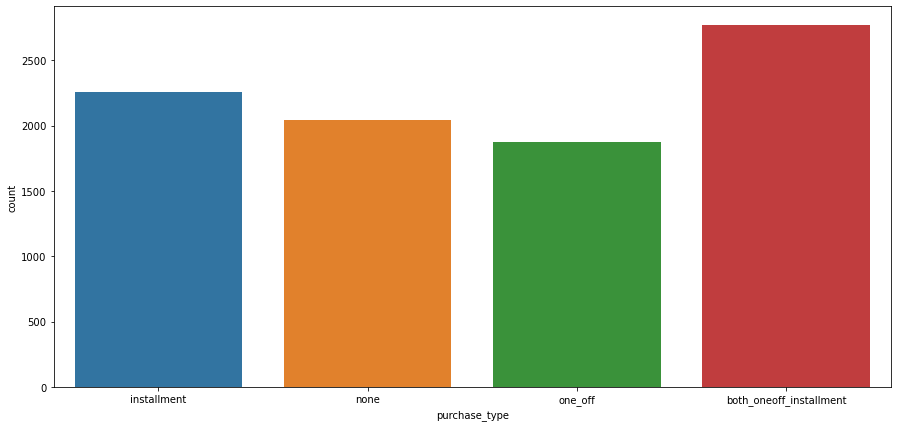

In [39]:
plt.figure(figsize=(15,7))
sns.countplot(x='purchase_type', data=cc_data)

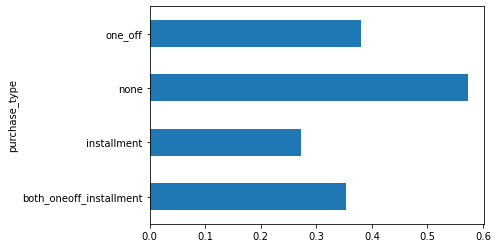

In [40]:
cc_data.groupby('purchase_type')['LIMIT_USAGE'].mean().plot.barh()

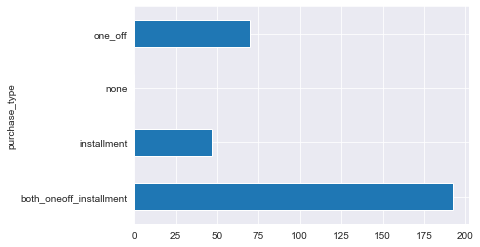

In [102]:
cc_data.groupby('purchase_type')['MONTHLY_AVG_PURCHASE'].mean().plot.barh()

## 2) Outliers:

In [41]:
# for i in cc_data.columns.drop(['purchase_type','TENURE']):
#     print(i)
#     sns.distplot(cc_data[i],bins='auto',color='green')
#     plt.title("Distribution for Variable "+i)
#     plt.ylabel("Density")
#     plt.show()

# There are many outliers in are data, so we will perform log transformation to remove outlier effect in our data

In [42]:
#log tranformation
# log_res = np.log(cc_data.drop('purchase_type', axis=1)+1) Another way to perform log transformation
cr_log=cc_data.drop(('purchase_type'),axis=1).applymap(lambda x: np.log(x+1))

In [43]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]]

In [44]:
cr_pre.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MONTHLY_AVG_PURCHASE,CASH_AVG_AMOUNT,LIMIT_USAGE,PAY_MIN_RATIO
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.353976
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.645689
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.104339
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.952918
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767


In [45]:
cr_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,CASH_AVG_AMOUNT,LIMIT_USAGE,PAY_MIN_RATIO
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,8.094870,6.624540,5.951599,0.117730,2.519680,3.050877,2.163970,0.296081,1.353976
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,0.819635,1.591763,1.179645,0.211617,0.130367,2.002823,2.429741,0.250303,0.940928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.645689
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,8.006701,6.754489,5.818979,0.000000,2.564949,3.494587,0.000000,0.264455,1.104339
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,8.779711,7.550732,6.762968,0.133531,2.564949,4.587295,4.606022,0.540911,1.952918
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


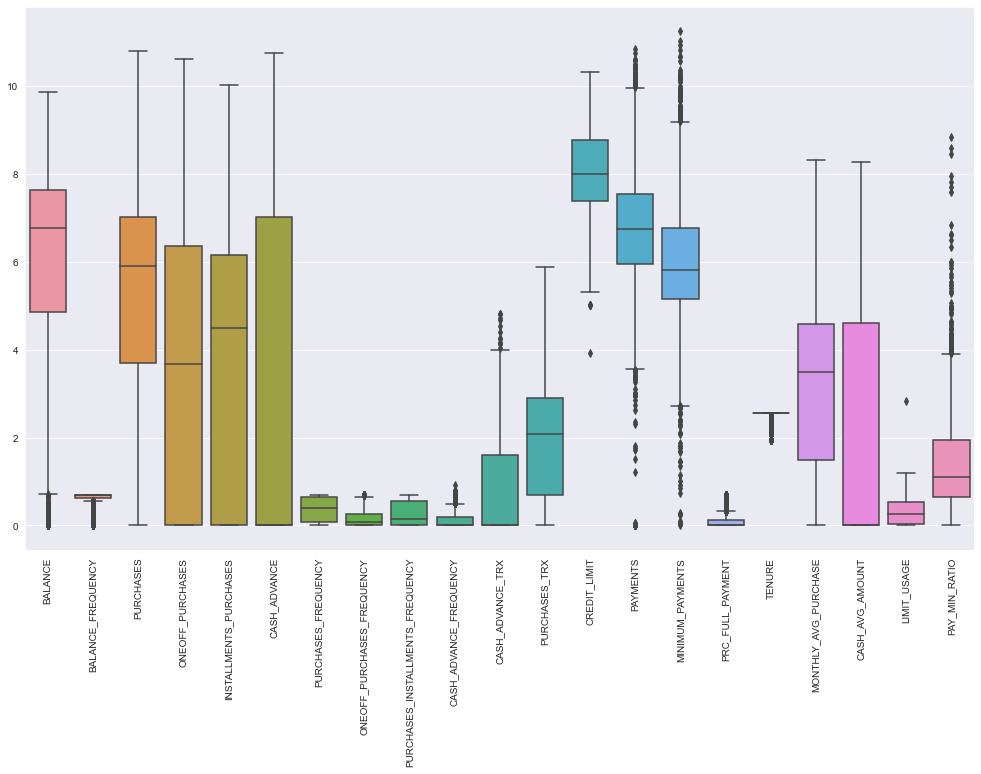

In [46]:
sns.set_style("darkgrid");
plt.figure(figsize=(17,10));
sns.boxplot(data=cr_log);
#sns.violinplot(data=df_out);
#sns.stripplot(data=df_out);
plt.xticks(rotation=90);

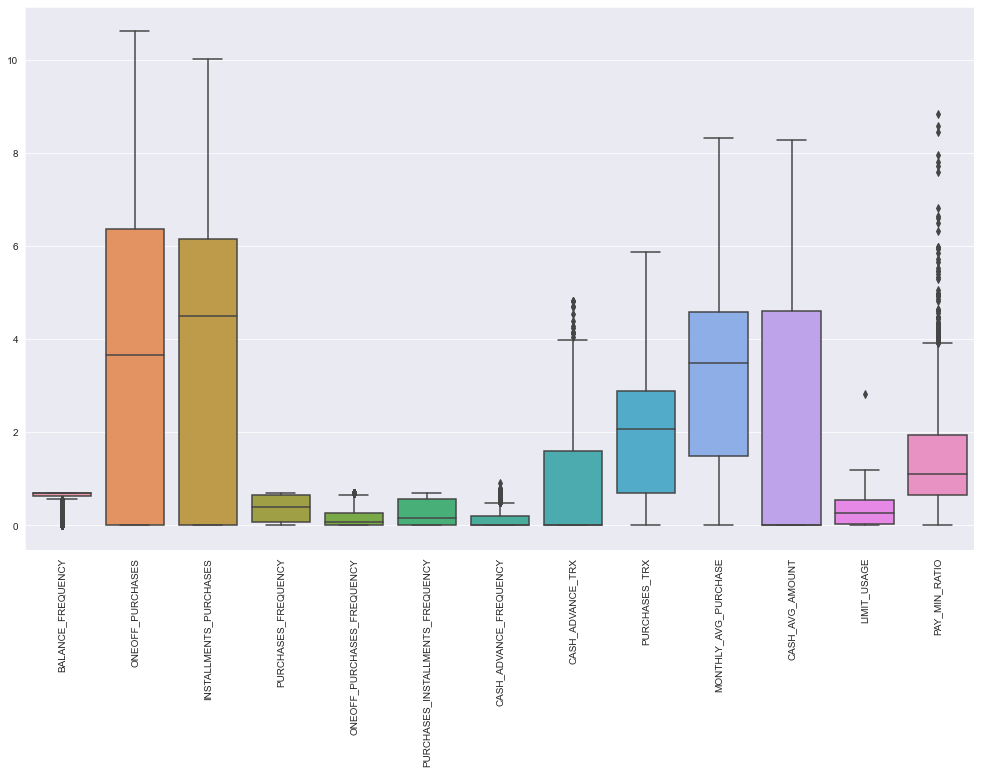

In [47]:
sns.set_style("darkgrid");
plt.figure(figsize=(17,10));
sns.boxplot(data=cr_pre);
#sns.violinplot(data=df_out);
#sns.stripplot(data=df_out);
plt.xticks(rotation=90);

# Now we will get some dummies data from categorical feature before moving to Feature Scailing

# Encoding(Dummy Data)

In [48]:
# Original dataset with categorical column converted to number type.
cc_original=pd.concat([cc_data,pd.get_dummies(cc_data['purchase_type'])],axis=1)

In [49]:
cc_original.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,CASH_AVG_AMOUNT,purchase_type,LIMIT_USAGE,PAY_MIN_RATIO,both_oneoff_installment,installment,none,one_off
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment,0.040901,1.446508,0,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none,0.457495,3.826241,0,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,one_off,0.332687,0.991682,0,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,124.916667,17.149001,one_off,0.222223,0.000000,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,one_off,0.681429,2.771075,0,0,0,1


In [50]:
# creating Dummies for categorical variable
cr_pre['purchase_type']=cc_data.loc[:,'purchase_type']
pd.get_dummies(cr_pre['purchase_type']).head()

E:\Ana_2020\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,both_oneoff_installment,installment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [51]:
cr_dum_data=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'])],axis=1)

In [52]:
cr_dum_data.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MONTHLY_AVG_PURCHASE,CASH_AVG_AMOUNT,LIMIT_USAGE,PAY_MIN_RATIO,purchase_type,both_oneoff_installment,installment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,installment,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,none,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,one_off,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,one_off,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,one_off,0,0,0,1


# Since we have split the purchase_type in to different categories and made dummy data out of it we ill simply drop it

In [53]:
pur_drop = ['purchase_type']

In [54]:
cr_dum_data = cr_dum_data.drop(pur_drop, axis=1)

In [55]:
cr_dum_data.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MONTHLY_AVG_PURCHASE,CASH_AVG_AMOUNT,LIMIT_USAGE,PAY_MIN_RATIO,both_oneoff_installment,installment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,0,0,0,1


In [56]:
cr_dum_data.shape

(8950, 17)

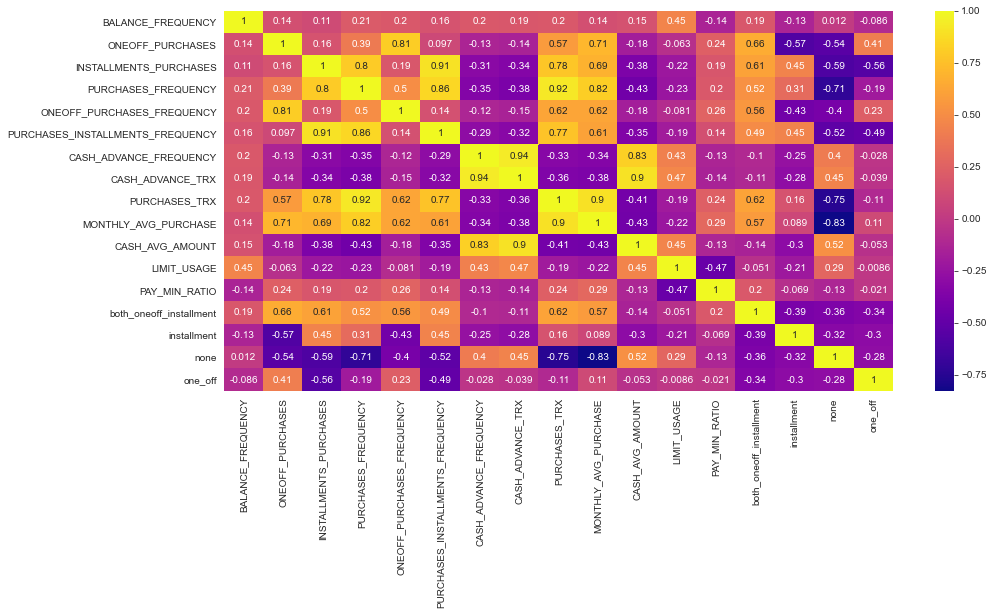

In [57]:
#Let's check for correaltion HeatMap
plt.figure(figsize=(15,7))
sns.heatmap(cr_dum_data.corr(), annot=True, cmap='plasma')

As we can see that there are so many faeture correlated to each other, we will perform Dimensionality Redection(PCA) to outperform multi-colinearity in data

Before doing PCA we will do Feature Scailing, to make the data on same scale

# Feature Scailing

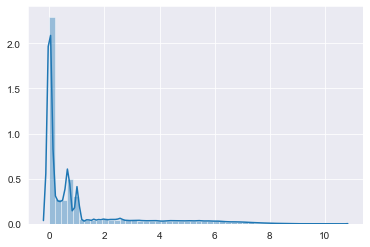

In [58]:
sns.distplot(a=cr_dum_data)

In [59]:
# plt.hist(x=cr_dum_data)

BALANCE_FREQUENCY


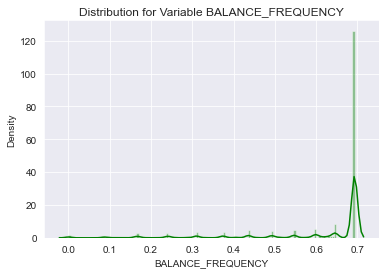

ONEOFF_PURCHASES


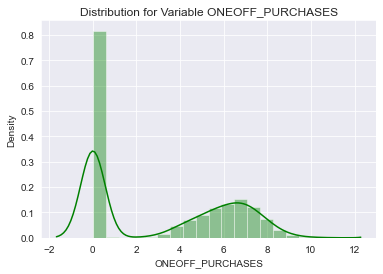

INSTALLMENTS_PURCHASES


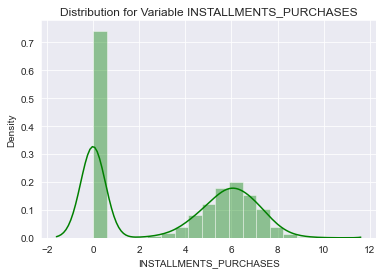

PURCHASES_FREQUENCY


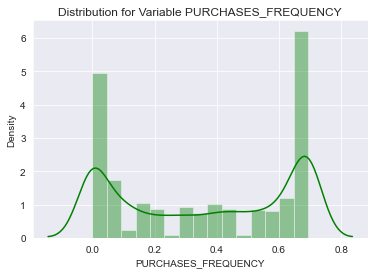

ONEOFF_PURCHASES_FREQUENCY


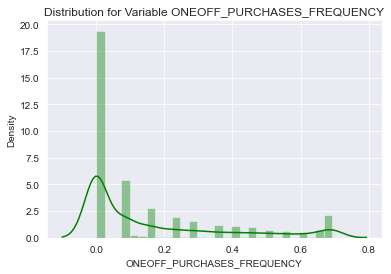

PURCHASES_INSTALLMENTS_FREQUENCY


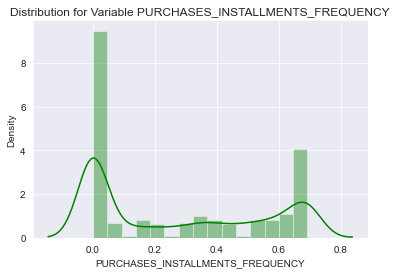

CASH_ADVANCE_FREQUENCY


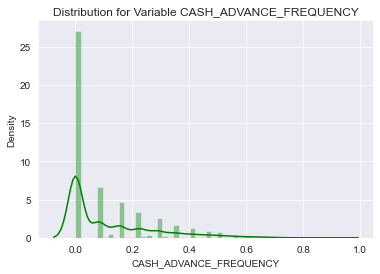

CASH_ADVANCE_TRX


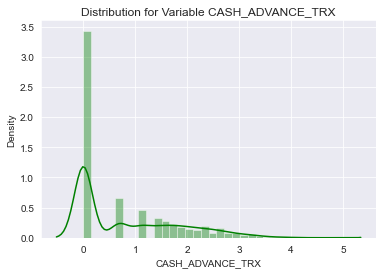

PURCHASES_TRX


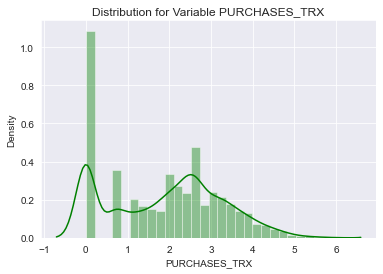

MONTHLY_AVG_PURCHASE


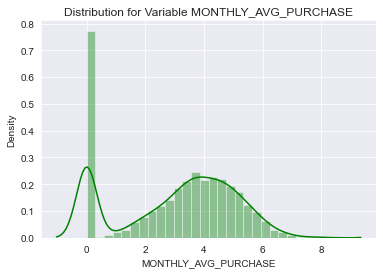

CASH_AVG_AMOUNT


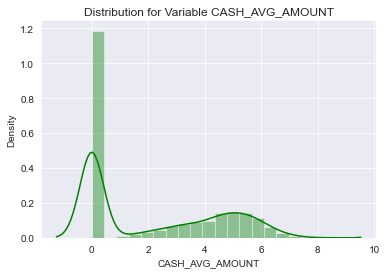

LIMIT_USAGE


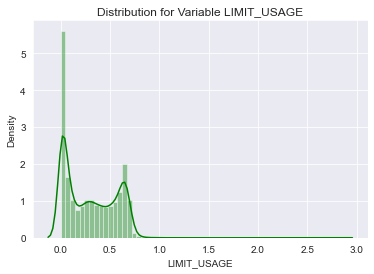

PAY_MIN_RATIO


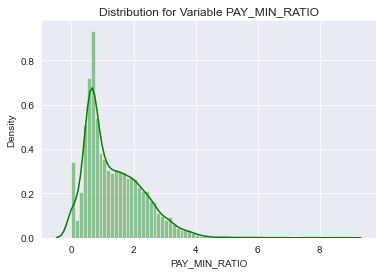

In [60]:
 for i in cr_dum_data.columns.drop(['both_oneoff_installment','installment','none','one_off']):
    print(i)
    sns.distplot(cr_dum_data[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

# Normalization(MinMaxScaler) ---> the data is scaled to a fixed range — usually 0 to 1.

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = MinMaxScaler()

In [63]:
cr_scaled = scaler.fit_transform(cr_dum_data)

In [64]:
cr_scaled

array([[0.86249662, 0.        , 0.45587891, ..., 1.        , 0.        ,
        0.        ],
       [0.93288587, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.62661054, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.87446886, 0.        , 0.49688973, ..., 1.        , 0.        ,
        0.        ],
       [0.87446886, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.73696588, 0.65920746, 0.        , ..., 0.        , 0.        ,
        1.        ]])

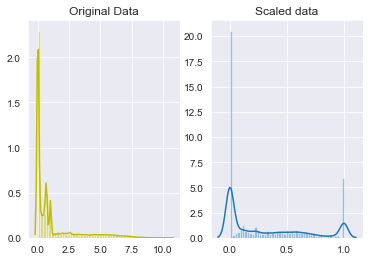

In [65]:
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(cr_dum_data, ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(cr_scaled, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

In [66]:
# Standardization (Standard Scalar) :standardization (or Z-score normalization) means centering the variable at zero and standardizing the variance at 1

In [67]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

In [68]:
# cr_scaled = scaler.fit_transform(cr_dum_data)

In [69]:
# cr_scaled

In [70]:
# # plot both together to compare
# fig, ax=plt.subplots(1,2)
# sns.distplot(cr_dum_data, ax=ax[0], color='y')
# ax[0].set_title("Original Data")
# sns.distplot(cr_scaled, ax=ax[1])
# ax[1].set_title("Scaled data")
# plt.show()

<!-- # Standardization (Standard Scalar) :standardization (or Z-score normalization) means centering the variable at zero and standardizing the variance at 1 -->

# Applying PCA

In [71]:
from sklearn.decomposition import PCA

In [72]:
var_ratio = {}
for n in range(4,15):
    pc = PCA(n_components=n)
    cc_pca = pc.fit(cr_scaled)
    var_ratio[n]=sum(cc_pca.explained_variance_ratio_)

In [73]:
var_ratio

{4: 0.8966615401688439,
 5: 0.9309878282249744,
 6: 0.9533607616757215,
 7: 0.971357308808533,
 8: 0.9790155695111322,
 9: 0.9843733119967549,
 10: 0.9894344790134013,
 11: 0.9931331163638687,
 12: 0.9951798868454225,
 13: 0.996954484103604,
 14: 0.9986183422553452}

**A rule of thumb is to preserve around 80 % of the variance**

Text(0, 0.5, 'Cumulative Explained Variance')

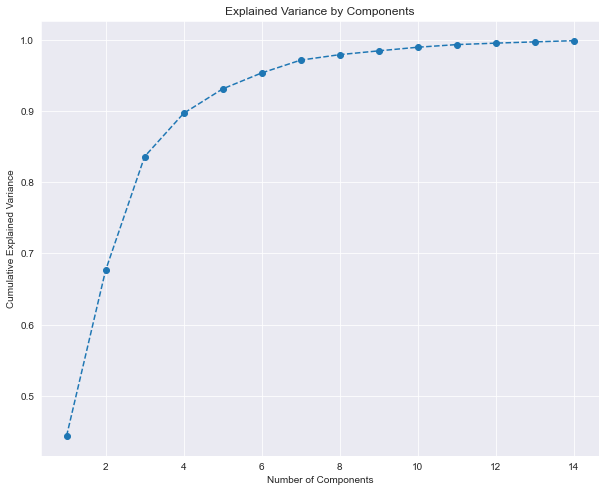

In [74]:
plt.figure(figsize=(10,8))
plt.plot(range(1,15), cc_pca.explained_variance_ratio_.cumsum(),marker = 'o', linestyle= '--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

# The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 4 components.

# Here we can see that 4 component is preserving 89% variance, so we will go will 4 component as it is covering almost 90% variance

In [75]:
pc_final = PCA(n_components= 4).fit(cr_scaled)

In [76]:
red_cr=pc_final.fit_transform(cr_scaled)

In [77]:
data = pd.DataFrame(red_cr)

In [78]:
data.shape

(8950, 4)

In [79]:
data.head()

,0,1,2,3
0,-0.205769,0.811401,0.372192,-0.269578
1,-1.283804,0.054005,-0.558175,0.067748
2,0.143477,-0.835312,0.951335,0.060474
3,-0.550640,-0.632359,0.792711,0.050013
4,-0.649708,-0.404392,0.794665,-0.233561


In [80]:
data.shape

(8950, 4)

# So initially we had 17 variables now its 4 so our variable go reduced 

In [81]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(4)])

PC_0    0.443859
PC_1    0.232468
PC_2    0.159668
PC_3    0.060666
dtype: float64

In [82]:
col_ls = cr_dum_data.columns

In [83]:
col_ls

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'MONTHLY_AVG_PURCHASE', 'CASH_AVG_AMOUNT', 'LIMIT_USAGE', 'PAY_MIN_RATIO', 'both_oneoff_installment', 'installment', 'none', 'one_off'], dtype='object')

In [84]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(4)],index=col_ls)

,PC_0,PC_1,PC_2,PC_3
BALANCE_FREQUENCY,0.037989,-0.046636,-0.096580,0.256935
ONEOFF_PURCHASES,0.182869,-0.402392,0.079663,0.014499
INSTALLMENTS_PURCHASES,0.315316,0.164857,-0.132757,0.012830
PURCHASES_FREQUENCY,0.431429,0.059819,0.045728,0.199554
ONEOFF_PURCHASES_FREQUENCY,0.188139,-0.334709,0.034443,0.055473
PURCHASES_INSTALLMENTS_FREQUENCY,0.398811,0.247639,-0.145718,0.126042
CASH_ADVANCE_FREQUENCY,-0.082453,-0.040460,-0.124855,0.371566
CASH_ADVANCE_TRX,-0.109962,-0.052226,-0.167499,0.464919
PURCHASES_TRX,0.254141,-0.034783,0.029724,0.100939
MONTHLY_AVG_PURCHASE,0.245354,-0.087260,0.109755,0.092721


# The above data gives us the eigenvector & eigenvector value for each components

-----------------------------------------------------------------------------------

# Clustering

# K-Means

In [85]:
# We will fir the K-means using the transform data rom the PCA
from sklearn.cluster import KMeans

In [86]:
wcss = []
for i in range(1,15):
    kmeans_pca =KMeans(n_clusters= i, init='k-means++',random_state=123)
    kmeans_pca.fit(red_cr)
    wcss.append(kmeans_pca.inertia_)

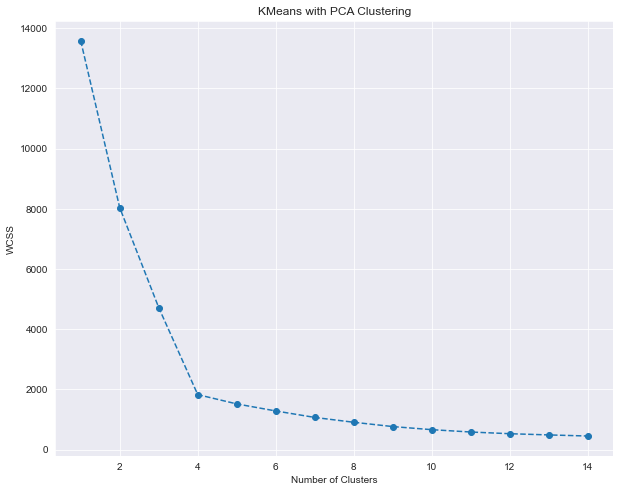

In [87]:
plt.figure(figsize=(10,8))
plt.plot(range(1,15), wcss,marker = 'o', linestyle= '--')
plt.title("KMeans with PCA Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Elbow Method

we determine the number of clusters we’d like to keep. To that effect, we use the **Elbow-method**. The approach consists of looking for a kink or **elbow** in the **WCSS graph**. Usually, the part of the graph before the elbow would be steeply declining, while the part after it – much smoother. In this instance, the kink comes at the **4 clusters mark**. So, we’ll be keeping a **four-cluster solution**.

In [88]:
#We have Chosen Four Clusters,so we run K-means with number of Cluster equals Four.
kmeans_pca=KMeans(n_clusters=4,init='k-means++',random_state=123)

In [89]:
kmeans_pca.fit(red_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [90]:
pd.Series(kmeans_pca.labels_).value_counts()

2    2774
0    2260
1    2042
3    1874
dtype: int64

# Let's analyze PCA & K-means Results

 **we’ll create a new data frame. It allows us to add in the values of the separate components to our segmentation data set. The components’ scores are stored in the ‘red_cr’ variable. Let’s label them Component 1, 2 and 3. In addition, we also append the ‘K means P C A’ labels to the new data frame.**

In [91]:
col_ =['PURCHASES_TRX','MONTHLY_AVG_PURCHASE','CASH_AVG_AMOUNT','LIMIT_USAGE','CASH_ADVANCE_TRX',
         'PAY_MIN_RATIO','both_oneoff_installment','installment','one_off','none','CREDIT_LIMIT']

In [92]:
# we'll create a new DF with original features and add the PCA scores and Kmeans clusters
cr_dum_data_pca_kmeans = pd.concat([cc_original[col_].reset_index(drop=True),pd.DataFrame(red_cr)],axis=1)
cr_dum_data_pca_kmeans.columns.values[-4:] = ['Component 1','Component 2', 'Component 3','Component 4']
cr_dum_data_pca_kmeans['Cluster_4'] = kmeans_pca.labels_

In [93]:
cr_dum_data_pca_kmeans.head()

,PURCHASES_TRX,MONTHLY_AVG_PURCHASE,CASH_AVG_AMOUNT,LIMIT_USAGE,CASH_ADVANCE_TRX,PAY_MIN_RATIO,both_oneoff_installment,installment,one_off,none,CREDIT_LIMIT,Component 1,Component 2,Component 3,Component 4,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,-0.205769,0.811401,0.372192,-0.269578,0
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,-1.283804,0.054005,-0.558175,0.067748,1
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,0.143477,-0.835312,0.951335,0.060474,3
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,-0.550640,-0.632359,0.792711,0.050013,3
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,-0.649708,-0.404392,0.794665,-0.233561,3


Now let's **Visualize Clusters by Components**

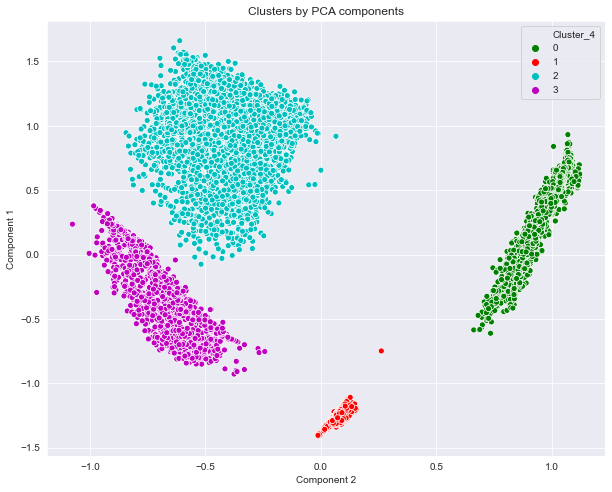

In [94]:
# Plot data by components. The Y-axis is the 1 component and X-axis is the 2 component.
x_axis = cr_dum_data_pca_kmeans['Component 2']
y_axis = cr_dum_data_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=cr_dum_data_pca_kmeans['Cluster_4'],palette=['g', 'r','c','m'])
plt.title('Clusters by PCA components')
plt.show()

# Let's Visualize all components by pair plots

In [95]:
df_pair_plot=pd.DataFrame(red_cr,columns=['PC_' +str(i) for i in range(4)])

In [96]:
df_pair_plot['Cluster']=kmeans_pca.labels_

E:\Ana_2020\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x504 with 0 Axes>

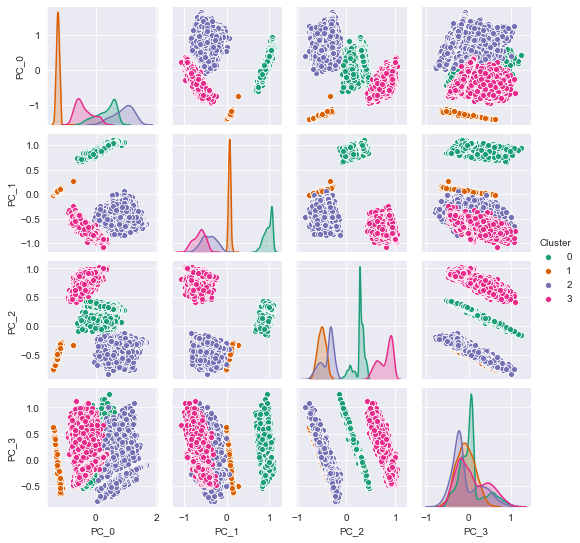

In [97]:
#pairwise relationship of components on the data
plt.figure(figsize=(15,7))
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

# It shows that first two components are able to indentify clusters

In [98]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cr_dum_data_pca_kmeans.groupby('Cluster_4')\
.apply(lambda x: x[col_].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,11.900885,0.001469,32.959625,7.109925
MONTHLY_AVG_PURCHASE,46.974347,0.000000,192.685172,69.688958
CASH_AVG_AMOUNT,38.398206,182.858169,67.821985,78.995966
LIMIT_USAGE,0.271678,0.573770,0.353548,0.381074
CASH_ADVANCE_TRX,1.265487,6.299706,2.832733,2.932231
PAY_MIN_RATIO,13.245074,10.076701,7.231176,5.498136
both_oneoff_installment,0.000000,0.000000,1.000000,0.000000
installment,1.000000,0.000000,0.000000,0.000000
one_off,0.000000,0.000000,0.000000,1.000000
none,0.000000,1.000000,0.000000,0.000000


E:\Ana_2020\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


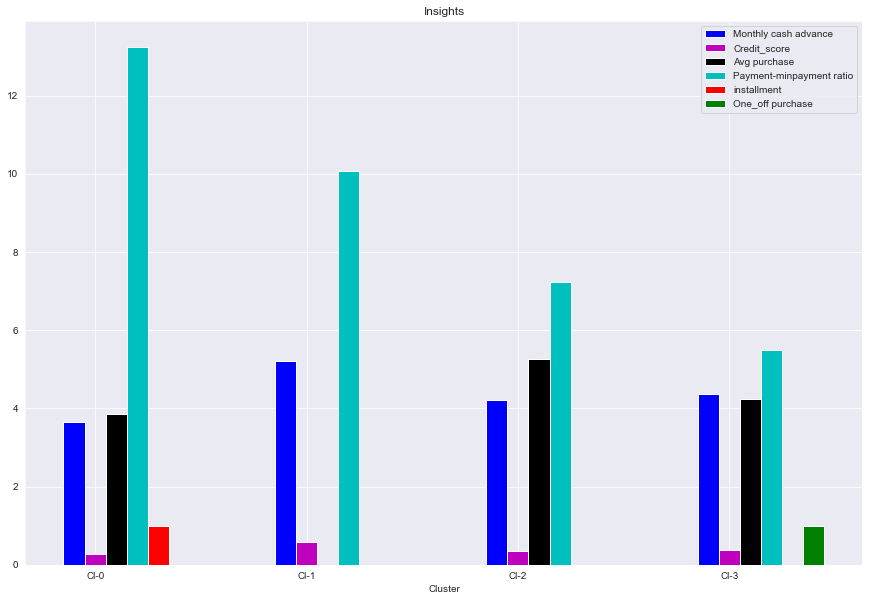

In [99]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['CASH_AVG_AMOUNT',:].values)
credit_score=(cluster_4.loc['LIMIT_USAGE',:].values)
purchase= np.log(cluster_4.loc['MONTHLY_AVG_PURCHASE',:].values)
payment=cluster_4.loc['PAY_MIN_RATIO',:].values
installment=cluster_4.loc['installment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

In [100]:
# Percentage of each cluster in the total customer base
s=cr_dum_data_pca_kmeans.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print(s,'\n')

per=pd.Series((s.values.astype('float')/ cr_dum_data_pca_kmeans.shape[0])*100,name='Percentage')
print("Cluster -4 ",'\n')
print(pd.concat([pd.Series(s.values,name='Size'),per],axis=1),'\n')

Cluster_4   
0          0    2260
1          1    2042
2          2    2774
3          3    1874
Name: Cluster_4, dtype: int64 

Cluster -4  

   Size  Percentage
0  2260   25.251397
1  2042   22.815642
2  2774   30.994413
3  1874   20.938547 



# Insights

# Clusters are clearly showing distinguishing behavior within customers

**Cluster 0  Customer Has the Maximum paymet ratio and installment and no one_purchase with least monthly cash advance. This group is about 2% of the total customer base.**

**Cluster 1 Customer has the 2nd most payment ratio with highest monthly cash advance and credit score/limit and also they are not insterested in purchasing.This group is about 23% of the total customer base**

**Cluster 2 Customer are doing Maximum Average Purchase Monthly with no installment & one_off Purchase.This group is about 31% of the total customer base**

**Cluster 3 Customer here are doing Maximum one_off Purchase with 2nd highest Average Purchase Monthly & Monthly Cash Advance.This group is about 21% of the total customer base**

# Marketing Strategy

**Group 0 They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score ) -- we can increase credit limit or can lower down interest rate -- Can be given premium card /loyality cards to increase transactions**

**Group 1 These are customers who are not interested in purchases rather they are availing Cash and has  2nd most good Payment Ratio. We can give some offers to make them purchase.**

**Group 2 These are the customer who are Making Maximum Monthly Purchase and fair ratio of Payment ratio. We can increase the credit limit and good cashback offers.**

**Group 3 These are customer who are doing maximum one_off purchases with fair Average purchase but having the least payment ratio. These group is bit risky to deal with.**

In [ ]:
**************************************************END*******************************************************************